<a href="https://www.kaggle.com/code/tuandino/telemarketing-campaigns-data-analysis?scriptVersionId=102773527" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
import sklearn
import math
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../input/marketing-banking-file/bank-additional-full.csv')

# <center> Telemarketing Campaigns Data Analysis

## Table of content:
* [1. Dataset Background and Project Goal](#first-bullet)
* [2. Clean data set](#second-bullet)
* [3. EDA](#third-bullet)
* [2. Machine learning (Classification)](#fourth-bullet)

# 1. Dataset Background and Project Goal <a class="anchor" id="first-bullet"></a>

#### 1.1 Dataset Background

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was required, in
order to access if the product (bank term deposit) would be (&#39;yes&#39;) or not (&#39;no&#39;) subscribed.

#### 1.2 Project Goal

Finding insights from the dataset to make the Bank has a clearer understand about their customers. Draw an idea customer profile to focus marketing effort to in the future. We also know which customers are less likely to make a term deposit so that we can avoid annoying them.

# 2. Clean dataset <a class="anchor" id="second-bullet"></a>

2.1 Deal with missing values

There are no missing values in this dataset. However there are some columns with value = 'Other' which is similar to missing values. We'll try to get rid of these rows

In [3]:
columns_with_other = ['job','marital','education','default','housing','loan']
def remove_other(column):
    condition = df[column] != 'unknown'
    return df[condition]
for column in columns_with_other:
    df = remove_other(column)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

We're left with 30488 rows

2.2 Identifying Outliers in Numeric columns

<AxesSubplot:xlabel='age'>

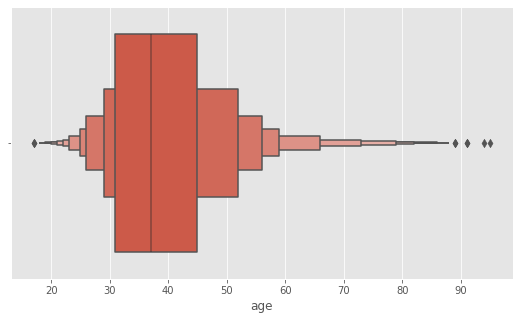

In [5]:
sns.boxenplot(df['age'])

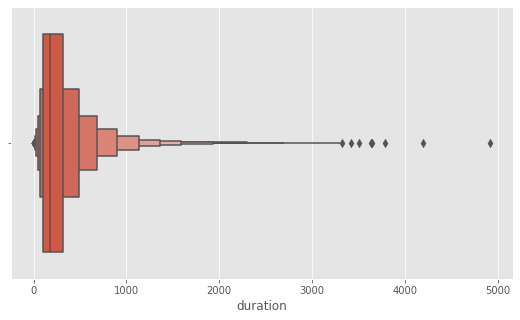

In [6]:
sns.boxenplot(df['duration']);

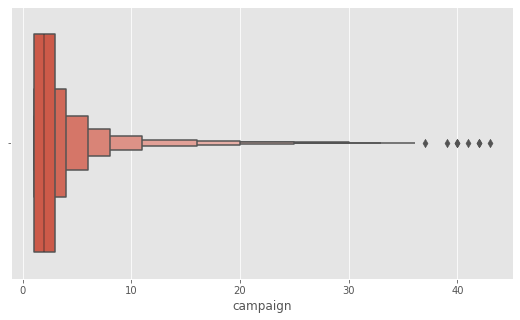

In [7]:
sns.boxenplot(df['campaign']);

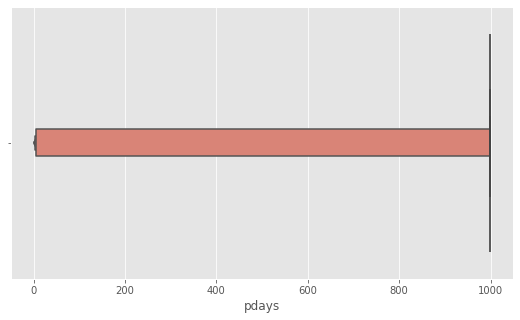

In [8]:
sns.boxenplot(df['pdays']);

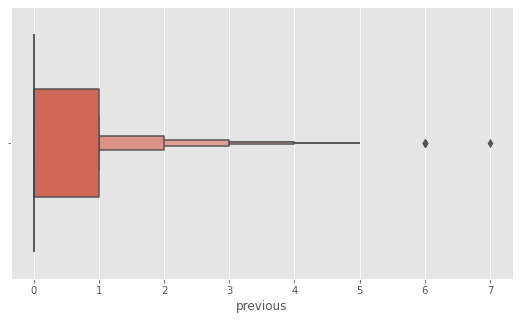

In [9]:
sns.boxenplot(df['previous']);

2.2 Convert boolean columns to numerical dtype for easier analysis

In [10]:
boolean_columns = ['default','housing','loan','y']
for column in boolean_columns:
    df[column] = df[column].apply(lambda x: 0 if x == 'no' else 1)
    df[column] = df[column].astype(int)

2.3 Change month column from categorical to numerical for easier analysis

In [11]:
months_map = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
df['month'] = df['month'].map(months_map)
df['month'] = df['month'].astype(int)

# 3. EDA <a class="anchor" id="third-bullet"></a>

#### 3.1 Age distribution of customers and relationship with y

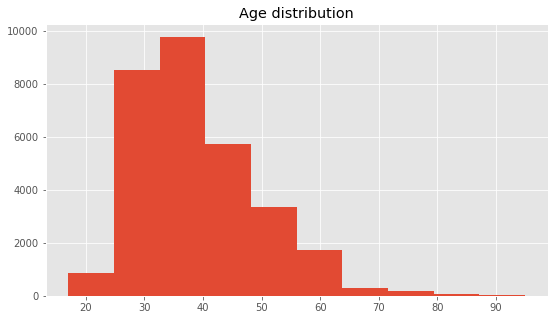

In [12]:
plt.hist(df['age'], bins = 10)
plt.title('Age distribution');

In [13]:
df['age'].describe()

count    30488.000000
mean        39.030012
std         10.333529
min         17.000000
25%         31.000000
50%         37.000000
75%         45.000000
max         95.000000
Name: age, dtype: float64

We can see that the age of the customers vary from 17 to 95. However, most of the customers being contacted are from 30-40. We can see that the first quartile = 31 and third = 45. The standard deviation is approximately 10.

''

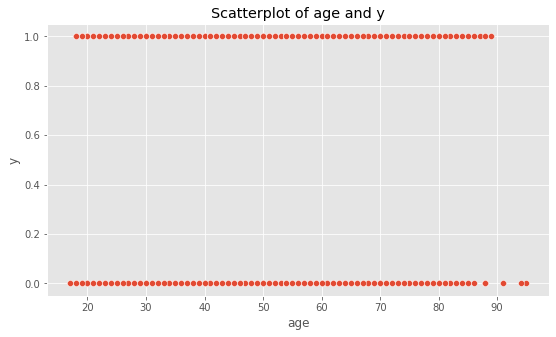

In [14]:
sns.scatterplot(data = df, x = 'age', y = 'y')
plt.title('Scatterplot of age and y')
;

In [15]:
df[['age','y']].corr()

,age,y
age,1.000000,0.048727
y,0.048727,1.000000


The scatterplot suggests that there's not a strong relationship between the age of the customers and if they make a deposit or not

#### 3.2 The distribution of duration

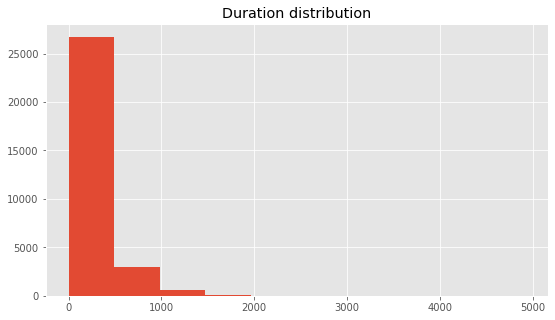

In [16]:
plt.hist(df['duration'])
plt.title('Duration distribution');

In [17]:
df['duration'].value_counts(bins = 10)

(-4.9190000000000005, 491.8]    26720
(491.8, 983.6]                   3005
(983.6, 1475.4]                   596
(1475.4, 1967.2]                  114
(1967.2, 2459.0]                   30
(2459.0, 2950.8]                   10
(2950.8, 3442.6]                    7
(3442.6, 3934.4]                    4
(3934.4, 4426.2]                    1
(4426.2, 4918.0]                    1
Name: duration, dtype: int64

We can see that the histogram of the duration feature is heavily left-skewed. This suggest that most of the phone call end very quickly.

#### 3.3 The distribution of campaign

Campaign is the number of contacts performed during this campaign. This shows how many times the customers was contacted by the bank.

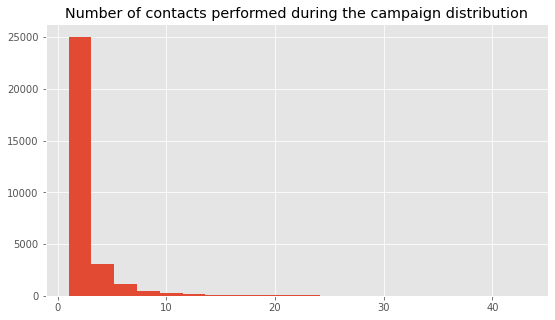

In [18]:
plt.hist(df['campaign'], bins = 20)
plt.title('Number of contacts performed during the campaign distribution');

In [19]:
df['campaign'].value_counts(bins = 10)

(0.957, 5.2]    28117
(5.2, 9.4]       1614
(9.4, 13.6]       431
(13.6, 17.8]      149
(17.8, 22.0]       87
(22.0, 26.2]       36
(26.2, 30.4]       28
(30.4, 34.6]       14
(38.8, 43.0]        7
(34.6, 38.8]        5
Name: campaign, dtype: int64

The distribution is heavily left-skewed. We can see that most of the customers are being contacted for less than 5 times during this campaign.

#### 3.4 Relationship between duration and campaign

The table below shows the response proportion for each number of calls in the dataset. Let's see which number of calls is idea

In [20]:
number_of_calls_response_prop = pd.crosstab(df['campaign'],df['y'], normalize='index')
pd.crosstab(df['campaign'],df['y'], normalize='index').head(5)

y,0,1
campaign,,
1,0.855051,0.144949
2,0.870443,0.129557
3,0.877849,0.122151
4,0.896748,0.103252
5,0.912630,0.087370


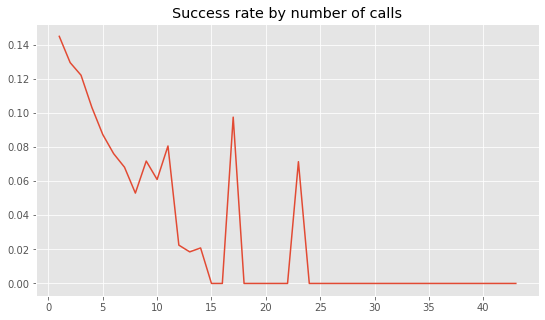

In [21]:
plt.plot(number_of_calls_response_prop[1])
plt.xticks(np.arange(0,43,5))
plt.title('Success rate by number of calls');

We can see that the success rate drops considerably after call number 10. This suggests that the more you call a customers, the less likely they're going to make a deposit.

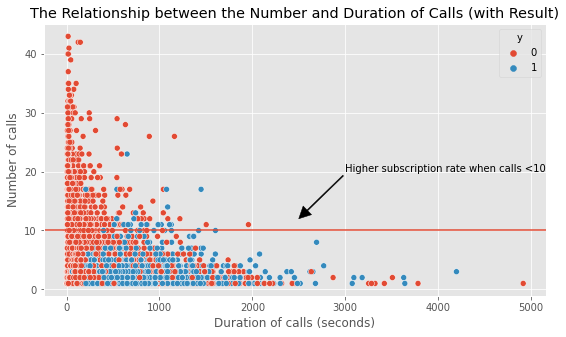

In [22]:
sns.scatterplot(data = df, x = 'duration', y = 'campaign', hue = 'y')
plt.ylabel('Number of calls')
plt.xlabel('Duration of calls (seconds)')
plt.title('The Relationship between the Number and Duration of Calls (with Result)')
plt.annotate('Higher subscription rate when calls <10',xytext = (3000,20),
             arrowprops=dict(color = 'k', width=1),xy=(2500,12))
plt.axhline(10);

=> A customer should only be called for a maximum of 10 times. After that we should not focus on these customers anymore as they're very unlikely to be converted

<center><img src="https://davescomputertips.com/wp-content/uploads/2015/04/angry-on-phone.jpg"/></center>

#### 3.5 Correlation matrix

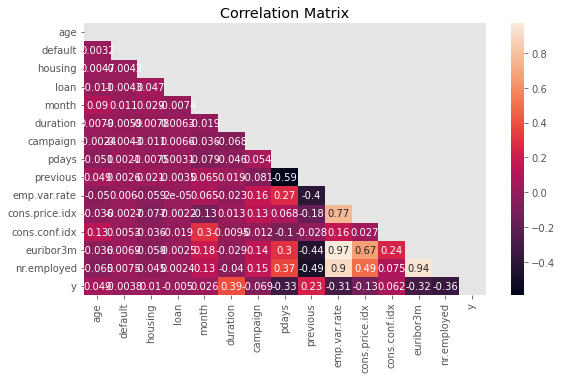

In [23]:
mask = np.triu(df.corr())
sns.heatmap(df.corr(), mask=mask, annot = True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix');

We can see a pretty strong correlation between duration and whether a customer makes a deposit or not. We can also see a mild correlation between y and previous: number of contacts performed before this campaign and for this client.

This suggests that it's more likely to convert a customers if they've been actively followed from the previous campaign.

#### 3.6. Subscription and contact proportion by age

In this section we will devide the customers to 4 groups of different age range. We'll try to see which group are being focused on the most and whether should we focus on these groups.

In [24]:
bins = [17,32,48,63,max(df['age'])]
labels = ['From 17 to 32', 'From 33 to 48', 'From 49 to 63', '64+']
df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels, include_lowest = True)

In [25]:
contact_distribution = df.groupby('age_group')['campaign'].sum()/df['campaign'].sum()
subscription_distribution = pd.crosstab(df['age_group'],df['y'],normalize = 'columns')[1].sort_index()

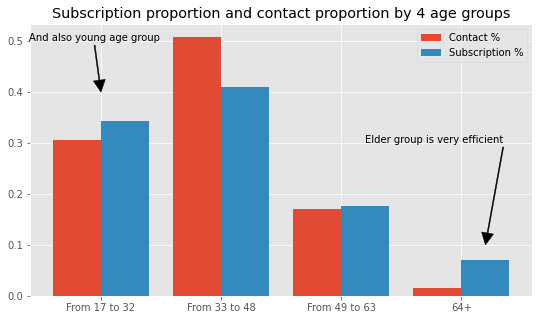

In [26]:
x_axis = np.arange(len(contact_distribution))
plt.bar(x_axis - 0.2, contact_distribution, width=0.4, label = 'Contact %')
plt.bar(x_axis +0.2, subscription_distribution, width=0.4, label = 'Subscription %')
plt.xticks(x_axis, contact_distribution.index)
plt.annotate('Elder group is very efficient',xytext = (2.2,0.3),
             arrowprops=dict(color = 'k', width=1),xy=(3.2,0.1))
plt.annotate('And also young age group',xytext = (-0.6,0.5),
             arrowprops=dict(color = 'k', width=1),xy=(-0,0.4))
plt.title('Subscription proportion and contact proportion by 4 age groups')
plt.legend();

#### Focus on young people
- We can see that the elder group of customers (64+) are being focused on the least with a contact proportion of ~ 1.5% but contribute to 6% of total subscription. This is understandable as elder people tend to make investments that are safe and will guarantee to return them an amount that they know beforehand. The fixed amount rate mean they will know what the return will be, more than that, even if the interests rates move lower, they'll still be locked in at the same rate of interest.
- Younger people (17-32) are also tend to like term deposit as they don't have enough knowledge to invest other types of investment. Therefore this is the second most efficient age group
- The bank focus most of its telemarketing effort to the middle age group (33-48), this age group doesn't perform that well compare to the younger and older age group
<br>=> The bank should focus more of its telemarketing effort to the younger and older groups. Most likely young age group as this age group still needs to be followed up for a while in order to convert them. Meanwhile for old age group it's easier to convert them as they most likely are already interested in this type of investment.

<center><img src="https://www.vichealth.vic.gov.au/-/media/Images/VicHealth/youthstrategy1200x525.jpg?h=525&la=en&w=1200&hash=1357CE3536A9C37AA03A360ECF0726A65602FB59"/></center>

#### 3.7. Subscription rate by job

In this section we'll try to find out which job is the most potential prospect based on the subscription rate: the number of customers say yes/ all contacted customers

In [27]:
job_subscription_rate = pd.crosstab(df['job'],df['y'],normalize='index')[1].sort_values(ascending = False)*100

''

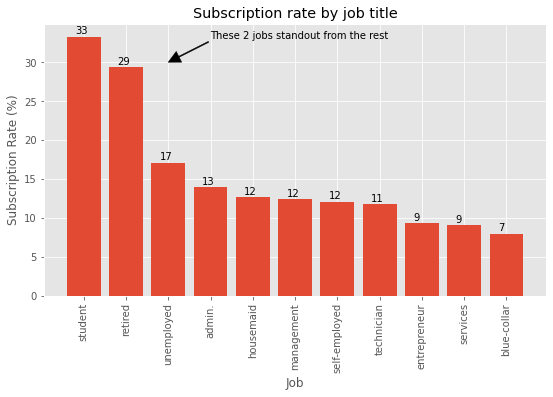

In [28]:
plt.bar(job_subscription_rate.index, job_subscription_rate)
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Subscription Rate (%)')
plt.title('Subscription rate by job title')
plt.annotate('These 2 jobs standout from the rest',xytext = (3,33),
             arrowprops=dict(color = 'k', width=1),xy=(2,30))
for i,v in enumerate(job_subscription_rate):
    plt.text(i-0.2,v+0.4,str(int(v)))
;

Just as the previous section suggest, student and retired are the 2 most efficient job group.
<br> => We should focus our telemarketing effort on student and retired people.

#### 3.8. Subscription and contact proportion by month

In [29]:
contact_proportion_month = df.groupby('month')['campaign'].sum()/df['campaign'].sum()*100

In [30]:
subscription_proportion_month = (pd.crosstab(df['month'],df['y'],normalize='index')*100)[1]

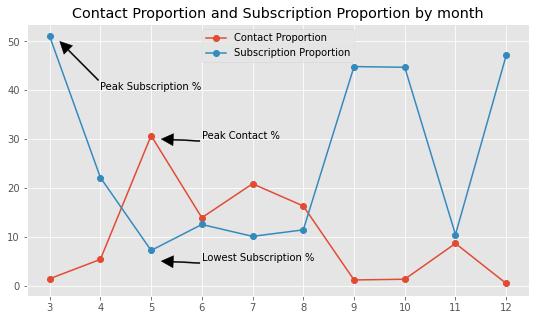

In [31]:
plt.plot(contact_proportion_month.index,contact_proportion_month,marker = 'o')
plt.plot(subscription_proportion_month.index,subscription_proportion_month,marker = 'o')
plt.xticks(subscription_proportion_month.index)
plt.legend(['Contact Proportion','Subscription Proportion'])
plt.title('Contact Proportion and Subscription Proportion by month')
plt.annotate('Peak Subscription %',xytext = (4,40),
             arrowprops=dict(color = 'k', width=1),xy=(3.2,50))
plt.annotate('Peak Contact %',xytext = (6,30),
             arrowprops=dict(color = 'k', width=1),xy=(5.2,30))
plt.annotate('Lowest Subscription %',xytext = (6,5),
             arrowprops=dict(color = 'k', width=1),xy=(5.2,5));

- We can see that the bank focused most of its telemarketing effort from May to August with the Peak Contact % happened in May with 30% of calls. However, May also has the lowest subscription %.
- We can see that the month March has the Peak Subscription %. However, March recorded the second lowest Contact %.
<br> => This chart suggests that the bank should consider focused their telemarketing effort on months that are more efficient (March, Sep, Nov, Dec)

#### 3.9. Subscription and contact proportion by marital status

In [32]:
contact_proportion_marital = df.groupby('marital')['campaign'].sum()/df['campaign'].sum()*100
subscription_proportion_marital = (pd.crosstab(df['marital'],df['y'],normalize='index')*100)[1]

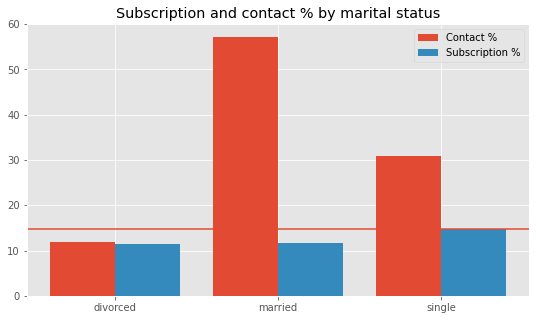

In [33]:
x_axis = np.arange(len(contact_proportion_marital))
plt.bar(x_axis - 0.2,contact_proportion_marital,width=0.4, label = 'Contact %')
plt.bar(x_axis +0.2,subscription_proportion_marital,width=0.4, label = 'Subscription %')
plt.xticks(x_axis, contact_proportion_marital.index)
plt.axhline(subscription_proportion_marital['single'])
plt.legend()
plt.title('Subscription and contact % by marital status');

We can see that's people who has marital status of single has a higher subscription % compare to the 2 other groups. However, the bank is focused more on the people with married status.
<br> => The bank should focus more on single people

<center><img src="https://do.lolwot.com/wp-content/uploads/2015/08/20-things-that-single-people-can-relate-to-1.jpg"/></center>

#### 3.10. Previous campaign status subscription rate

In this section we'll see if a customers who has been contacted from previous campaign is easier to convert in this campaign

In [34]:
previous = df['previous'].apply(lambda x: 'Yes' if x > 0 else 'No')
no = pd.crosstab(df['y'], previous, normalize='columns')['No'][1]
yes = pd.crosstab(df['y'], previous, normalize='columns')['Yes'][1]

Text(0.5, 1.0, 'Subscription rate by previous campaign status')

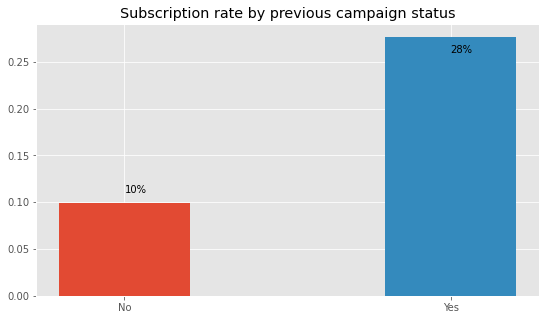

In [35]:
plt.bar(0,no, width=0.4, label = "Haven't beencontacted previous campaign")
plt.bar(1, yes, width=0.4, label = 'Have been contacted previous campaign')
plt.xticks([0,1],['No','Yes'])
plt.text(0,0.11,'10%')
plt.text(1,0.26,'28%')
plt.title('Subscription rate by previous campaign status')

We can see that a customer is more likely to be converted if they've already been contacted from previous campaign.
<br> => The bank should focus more on following up with customers that have been contacted from previous campaign

# 4. Machine learning (Classification) <a class="anchor" id="fourth-bullet"></a>

### 4.1 Data preprocessing

#### 4.1.1 Select most relevant variables

First I'll select most relevant variables to the customers
- Job
- Education
- Age
- Default
- Housing
- Loan

In [36]:
ml_df = df[['job','education','age','default','housing','loan']]
response = df['y']

#### 4.1.2 Generate dummy variables for categorical variables

We've already transform 'housing', 'default' and 'loan' columns from previous steps. Let's convert 'job' and 'education' to numeric

In [37]:
cat_df_dummies = pd.get_dummies(ml_df, columns=['job','education'])
cleaned_dataset = pd.merge(cat_df_dummies, response, left_index = True, right_index = True)

#### 4.1.3 Feature selection

In [38]:
arr = cleaned_dataset.values
X = arr[:,0:-1]
Y = arr[:,-1]

#### 4.1.4 Split train/test
I'll go with 20% train test split for model fitting

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [40]:
test_size= 0.2
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=test_size, random_state=42)

### 4.2. Testing with different classification algorithms

In this section I'll test with 2 classification algorithms: KNN, Decision Tree

### 4.2.1 KNN

#### Standardize dataset

In [41]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

#### Find the best K Value

Usually the best value for k is the square root of number of data points in the dataset. Let's do a test to see which K performs best

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

We'll see with k value from 1 to 9 then which k value has the lowest error rate

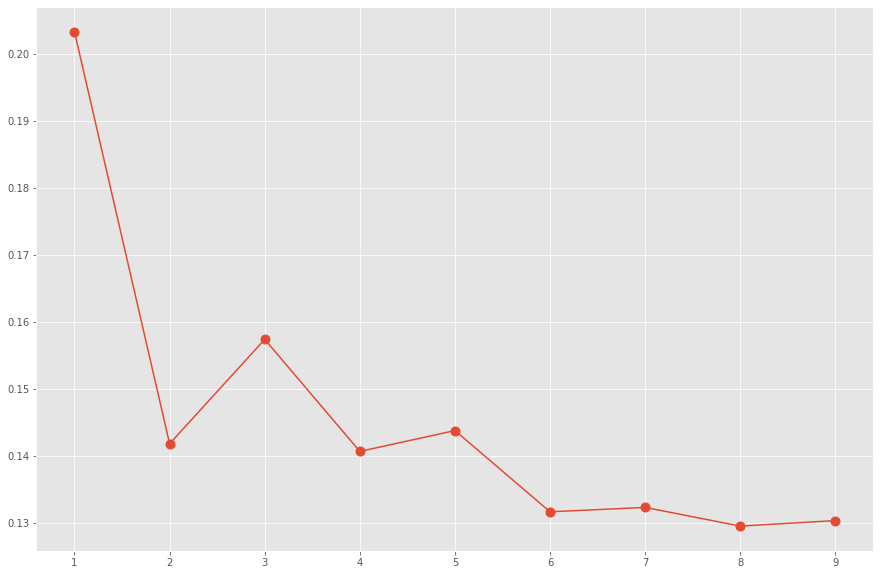

In [43]:
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,10),error_rate, marker='o', markersize=9);

Because my computer is slow so I'll only test with K value from 1 to 9. However it's the best practice to choose K-value around square root of number of training data points.
We can see that's K value = 8 has the lowest error rate

#### Fit to model

In [44]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K Nearest Neighbour', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res

,Model,Accuracy,Precision,Recall,F1 Score
0,K Nearest Neighbour,0.870449,0.558824,0.023929,0.045894


We have an above average precision metric but the recall is bad. This suggest that due to the unbalance distribution of y, most of the times the model will just predict it to be negative.

In [45]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[5289   15]
 [ 775   19]]


<AxesSubplot:>

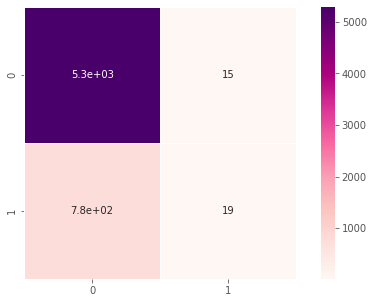

In [46]:
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="RdPu")

### 4.2.2 Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=20,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, random_state=0)

classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_split=20,
                       random_state=0)

In [48]:
y_pred_dt=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_dt))

0.8688094457199081


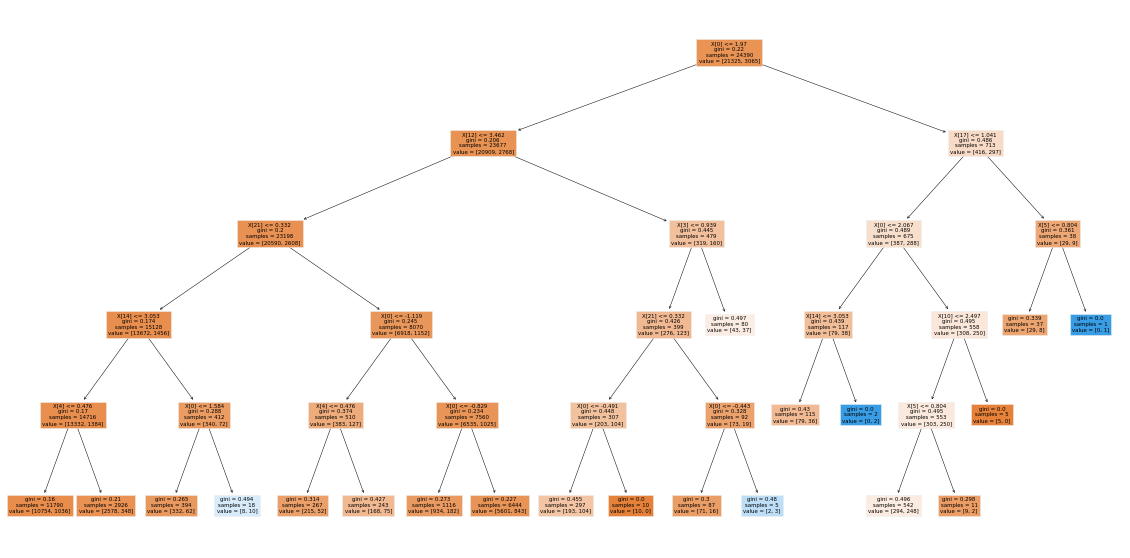

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True)
plt.show()

In [50]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_dt)
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

res2 = pd.DataFrame([['Decision Tree', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res2

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.868809,0.2,0.002519,0.004975


In [51]:
pd.concat([res,res2], axis=0, join='inner')

,Model,Accuracy,Precision,Recall,F1 Score
0,K Nearest Neighbour,0.870449,0.558824,0.023929,0.045894
0,Decision Tree,0.868809,0.200000,0.002519,0.004975


K-nearest neighbor is better

## Conclusion

According to the analysis, there are some recommendations as below
* Focus more on younger people (17-32) or older people (64+) rather than middle age people
* Should keep the number of calls for a customer < 10
* Focus more on student or retired people
* Focus more on single people
* Focus on months that are more efficient (March, Sep, Nov, Dec)
* Focus on following up with customers that have been contacted from previous campaign